In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.tools as tls
import seaborn as sns
%matplotlib qt

In [2]:
#Create connection to SQLite database
con= sqlite3.connect('sf_salaries.sqlite')

#Use pandas to query database
police= pd.read_sql_query('''SELECT * FROM Salaries WHERE JobTitle LIKE '%POLICE%' ''',con)

In [14]:
police.head(1)#A little messy, we'll get rid of unnecessary columns

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,


In [15]:
policeClean= police.drop(['Id','EmployeeName','JobTitle','Notes','Agency','Status'], axis= 1)
#Year 2011 has more complete info than other years, let's work with that
police2011= policeClean[policeClean['Year'] == 2011]

In [16]:
police2011.head()#Let's take a quick look at the data

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,155966,245131.88,137811.38,,538909.28,538909.28,2011
1,212739,106088.18,16452.60,,335279.91,335279.91,2011
2,99722,87082.62,110804.30,,297608.92,297608.92,2011
3,198778,73478.20,13957.65,,286213.86,286213.86,2011
4,256470,0.00,11522.18,,267992.59,267992.59,2011


In [17]:
#Now let's split this into a training and test dataset to 
from sklearn.cross_validation import train_test_split

train2011, test2011 = train_test_split(police2011, test_size = 0.2)

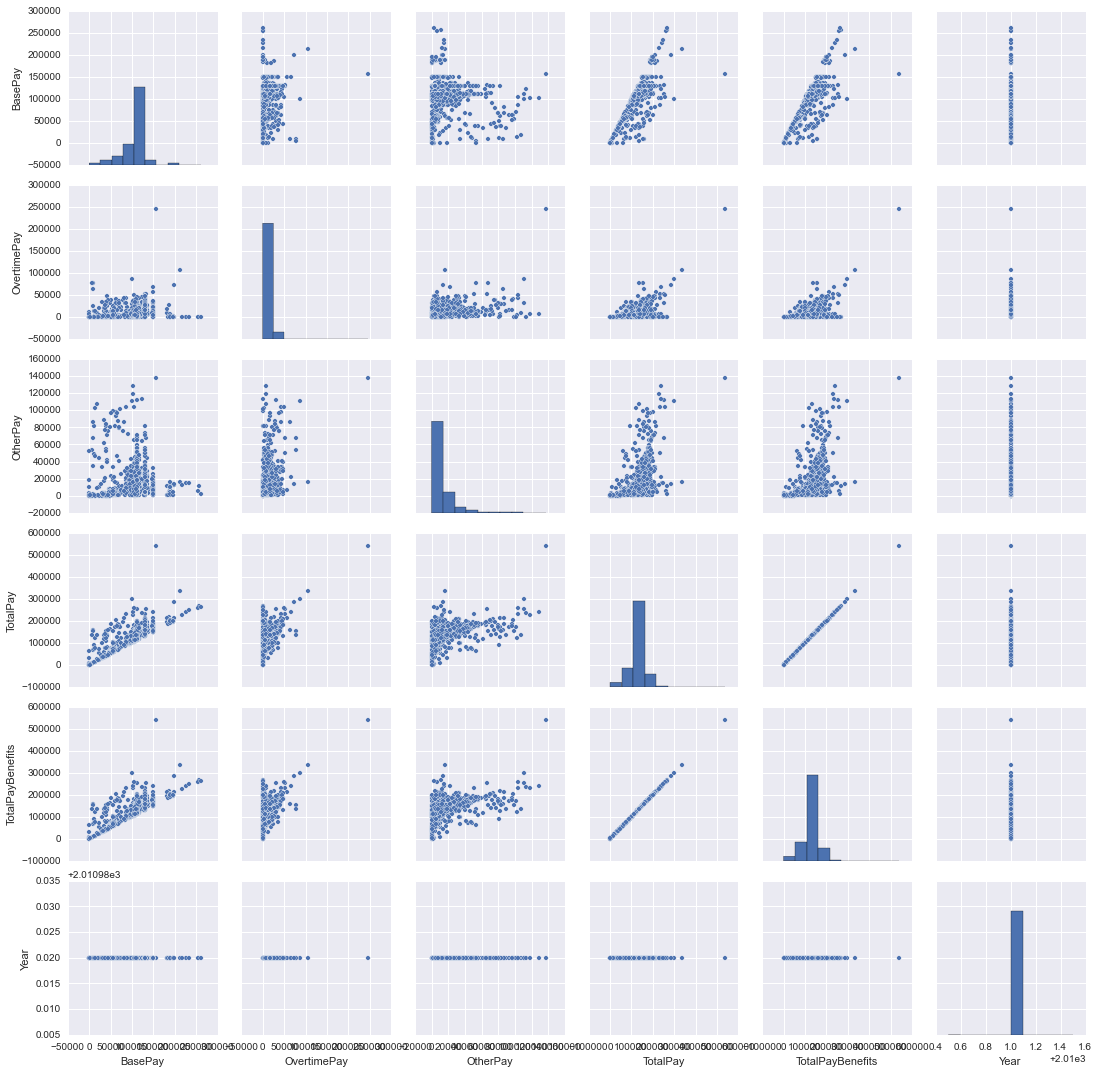

In [20]:
#Now let's see if we can identify any trends
%matplotlib inline
sns.pairplot(train2011)

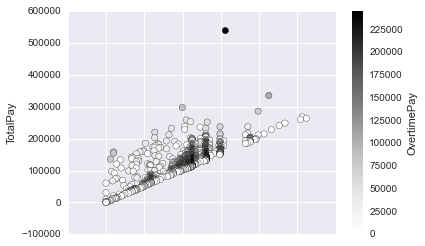

In [25]:
police2011.plot(kind= 'scatter', x= 'BasePay',y= 'TotalPay', c= 'OvertimePay',s= 40)
#police2011.plot(kind= 'scatter', x= 'BasePay',y= 'TotalPay', s= police2011['OvertimePay']*.0005)

In [26]:
#Log into plotly, import modules to make the above plot interactive
tls.set_credentials_file(username="Diego", api_key="wimmid7dku")
import plotly.graph_objs as go
import plotly.plotly as py

trace1 = go.Scatter(
    x= police2011['BasePay'], y= police2011['TotalPay'],
    mode='markers',
    marker=dict(size='10', color = police2011['OvertimePay'], #set color equal to a variable
        colorscale='Viridis',
        showscale= True)
)
data = [trace1]

py.iplot(data, filename='scatter-plot-with-colorscale')

PlotlyDictKeyError: Invalid key, 'showscale', for class, 'Marker'.

Run 'help(plotly.graph_objs.Marker)' for more information.

Path To Error:
['marker']['showscale']

Additional Notes:
That key is valid only in these objects:

	Heatmap('showscale'="a boolean: True | False")
	Contour('showscale'="a boolean: True | False")
	Histogram2d('showscale'="a boolean: True | False")
	Histogram2dContour('showscale'="a boolean: True | False")
